In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

from data_preprocessing import preprocess_text
from word2vec import build_and_train_w2v, save_w2v, load_embeddings, create_sentence_vectors
from Models.models_utils import *

2023-08-30 14:37:32.475522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load the data
reddit_df = pd.read_csv('Data/Suicide_Detection.csv', index_col=0)
reddit_df.reset_index(drop=True, inplace=True)

reddit_df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### Preprocess Data

In [8]:
reddit_df['cleaned_text'] = reddit_df['text'].apply(lambda row: preprocess_text(row)) # Takes 108 m 
reddit_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not get affected compliment come someone...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost never hear bad year ever swear ...
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello name adam struggle year afraid past...


In [21]:
# Export cleaned dataset
reddit_df.to_csv('Data/Suicide_Detection_Cleaned.csv', index=False)

NameError: name 'reddit_df' is not defined

In [22]:
cleaned_reddit_df = pd.read_csv('Data/Suicide_Detection_Cleaned.csv')

In [29]:
cleaned_reddit_df = cleaned_reddit_df.dropna()
cleaned_reddit_df.reset_index(drop=True, inplace=True)

In [30]:
cleaned_reddit_df

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not get affected compliment come someone...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost never hear bad year ever swear ...
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello name adam struggle year afraid past...
...,...,...,...
231969,If you don't like rock then your not going to ...,non-suicide,not like rock not go get anything go
231970,You how you can tell i have so many friends an...,non-suicide,tell many friend not lonely everything deprive...
231971,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,pee probably taste like salty tea someone drin...
231972,The usual stuff you find hereI'm not posting t...,suicide,usual stuff find herein not post sympathy pity...


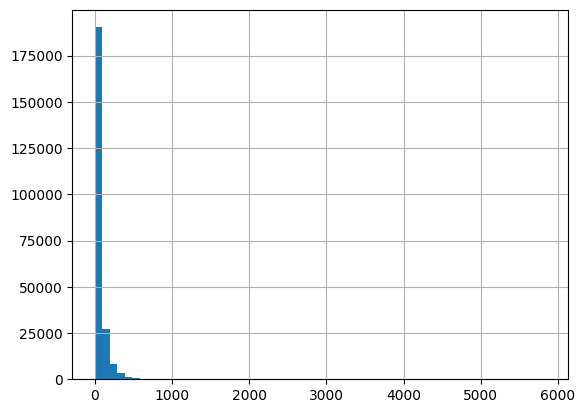

count    231974.000000
mean         62.222525
std          99.919864
min           1.000000
25%          13.000000
50%          29.000000
75%          73.000000
max        5842.000000
dtype: float64


In [31]:
posts_len = [len(x.split()) for x in cleaned_reddit_df['cleaned_text']]
pd.Series(posts_len).hist(bins=60)
plt.show()
print(pd.Series(posts_len).describe())

In [32]:
cleaned_reddit_df = cleaned_reddit_df[cleaned_reddit_df['cleaned_text'].apply(lambda x: len(x.split()) <= 73)]
cleaned_reddit_df.reset_index(drop=True, inplace=True)

In [33]:
cleaned_reddit_df

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not get affected compliment come someone...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost never hear bad year ever swear ...
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight can not anymore quit
...,...,...,...
174219,I did something today I went sledding with my ...,non-suicide,something today go sled friend may not seem li...
174220,If you don't like rock then your not going to ...,non-suicide,not like rock not go get anything go
174221,You how you can tell i have so many friends an...,non-suicide,tell many friend not lonely everything deprive...
174222,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,pee probably taste like salty tea someone drin...


In [34]:
# Export cleaned dataset
cleaned_reddit_df.to_csv('Data/Suicide_Detection_Final.csv', index=False)